# Impact of $CO_2$ Emissions on Global Tempearature

In this case study, we utilize the worldwide temperature and $CO_2$ concentration data to uncover the role of the increase in $CO_2$ emissions on global warming.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
co2_data = pd.read_csv('./carbon-emissions/carbon_emmission.csv')
temperature = pd.read_csv('./carbon-emissions/temperature.csv')

In [3]:
co2_data.head()

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86


In [4]:
temperature.head()

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [5]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ObjectId  1570 non-null   int64  
 1   Country   1570 non-null   object 
 2   Date      1570 non-null   object 
 3   Value     1570 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 49.2+ KB


In [6]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ObjectId  225 non-null    int64  
 1   Country   225 non-null    object 
 2   ISO2      223 non-null    object 
 3   ISO3      225 non-null    object 
 4   F1961     188 non-null    float64
 5   F1962     189 non-null    float64
 6   F1963     188 non-null    float64
 7   F1964     188 non-null    float64
 8   F1965     188 non-null    float64
 9   F1966     192 non-null    float64
 10  F1967     191 non-null    float64
 11  F1968     191 non-null    float64
 12  F1969     190 non-null    float64
 13  F1970     189 non-null    float64
 14  F1971     191 non-null    float64
 15  F1972     192 non-null    float64
 16  F1973     193 non-null    float64
 17  F1974     192 non-null    float64
 18  F1975     188 non-null    float64
 19  F1976     189 non-null    float64
 20  F1977     185 non-null    float6

In [7]:
# Extracting values and calculating stats
temperature_values = temperature.filter(regex='^F').stack()
temperature_stats = {'mean': temperature_values.mean(),
                    'median': temperature_values.median(),
                    'std': temperature_values.std()}

co2_values = co2_data['Value']
co2_stats = {'mean': co2_values.mean(),
            'median': co2_values.median(),
            'std': co2_values.std()}

In [8]:
temperature_stats, co2_stats

({'mean': np.float64(0.5377713483146068),
  'median': np.float64(0.47),
  'std': np.float64(0.6553262417685113)},
 {'mean': np.float64(180.71615286624203),
  'median': np.float64(313.835),
  'std': np.float64(180.5547064041616)})

# Time-series Analysis

## Scatter plot

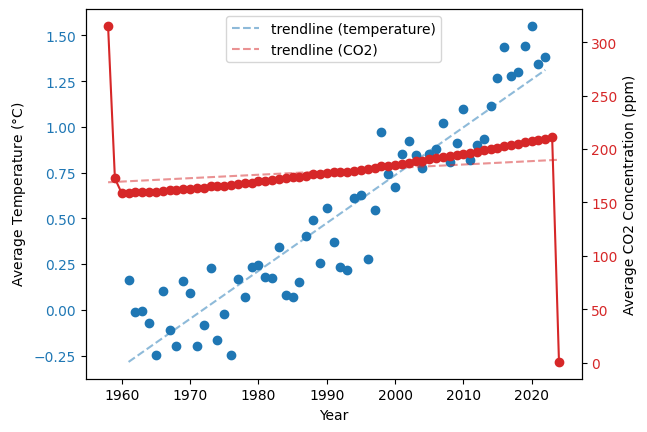

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# temperature: averaging across countries for each year
temperature_years = temperature.filter(regex='^F').mean(axis=0)
temperature_years.index = temperature_years.index.str.replace('F', '').astype(int)

## Temperature trendline
temp_trend = linregress(temperature_years.index, temperature_years.values)
temp_trend_line = temp_trend.slope * temperature_years.index + temp_trend.intercept

# CO2: parsing year and averaging monthly data
co2_data['Year'] = co2_data['Date'].str[:4].astype(int)
co2_yearly = co2_data.groupby('Year')['Value'].mean()

## CO2 trendline
co2_trend = linregress(co2_yearly.index, co2_yearly.values)
co2_trend_line = co2_trend.slope * co2_yearly.index + co2_trend.intercept

fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

# Temperature over the years
color = 'tab:blue'
ax1.scatter(temperature_years.index, temperature_years)
ln1 = ax1.plot(temperature_years.index, temp_trend_line, ls='--', alpha=0.5, color=color, label='trendline (temperature)')
ax1.set_xlabel('Year')
ax1.set_ylabel(r'Average Temperature ($\degree$C)')
ax1.tick_params(axis ='y', labelcolor = color)

# CO2 concentration over the years
color = 'tab:red'
ax2.plot(co2_yearly.index, co2_yearly, marker='o', color=color)
ln2 = ax2.plot(co2_yearly.index, co2_trend_line, ls='--', alpha=0.5, color=color, label='trendline (CO2)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average CO2 Concentration (ppm)')
ax2.tick_params(axis ='y', labelcolor = color)

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center')
plt.savefig('./plots/comb_plot.png')

## Correlation Matrix

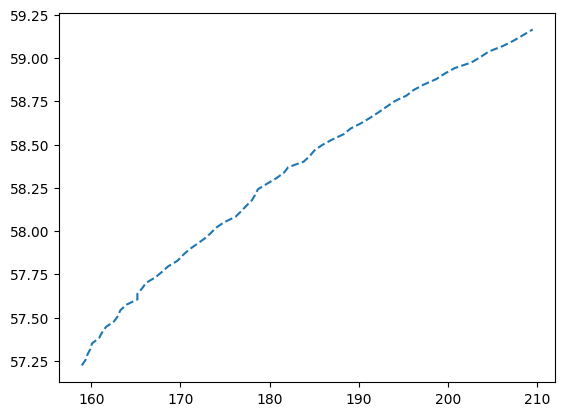

In [10]:
# correlation heatmap
merged_data = pd.DataFrame({
    "Temperature Change": temperature_years,
    "CO2 Concentration": co2_yearly
}).dropna()

trend = linregress(merged_data.iloc[:,1], merged_data.iloc[:,0])
trendline = trend.slope * merged_data.iloc[:, 1].index + trend.intercept

plt.figure()
merged_data.corr().style.background_gradient(cmap='coolwarm')
plt.plot(merged_data.iloc[:, 1], trendline, ls='--', )

## Temperature vs CO2 Concentration

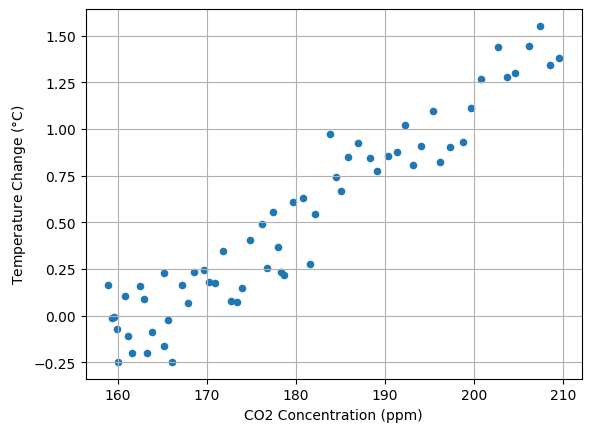

In [11]:
merged_data.plot.scatter(x='CO2 Concentration', y='Temperature Change')

plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Temperature Change ($\degree$C)')
plt.grid()
plt.savefig('./plots/temp_vs_co2.png')

## Seasonal Variations

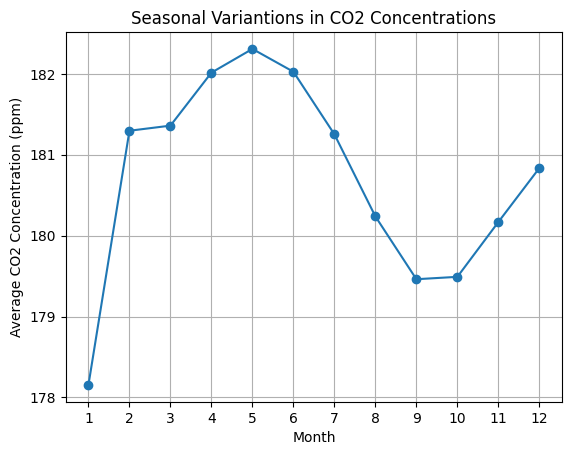

In [12]:
# seasonal variations in CO2 concentrations
co2_data['Month'] = co2_data['Date'].str[-2:].astype(int)
co2_monthly = co2_data.groupby('Month')['Value'].mean()

co2_monthly.plot(marker='o')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Average CO2 Concentration (ppm)')
plt.grid()
plt.title('Seasonal Variantions in CO2 Concentrations')
plt.savefig('./plots/co2_seasonal_variations.png')

## Granger Causality Test

Granger Causality test is a statistical time series test to identify the predictive power of one time series (in this case the yearly CO2 trends) in predicting the value of the other (in this case, global average temperature trends).

For our purpose, we will use the Granger p-value to make an argument about whether increase or decrease in CO2 concentration 'Granger cause' the subsequent change in the global temperatures.

In [13]:
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.stattools import grangercausalitytests

# pearson and spearman correlation coefficients
pearson_corr, _ = pearsonr(merged_data["CO2 Concentration"], merged_data["Temperature Change"])
spearman_corr, _ = spearmanr(merged_data["CO2 Concentration"], merged_data["Temperature Change"])

# granger causality test
granger_data = merged_data.diff().dropna()  # first differencing to make data stationary
granger_results = grangercausalitytests(granger_data, maxlag=3, verbose=False)

# extracting p-values for causality
granger_p_values = {f"Lag {lag}": round(results[0]['ssr_chi2test'][1], 4)
                    for lag, results in granger_results.items()}

pearson_corr, spearman_corr, granger_p_values

(np.float64(0.9554282559257312),
 np.float64(0.9379013371609882),
 {'Lag 1': np.float64(0.0617),
  'Lag 2': np.float64(0.6754),
  'Lag 3': np.float64(0.2994)})

## Lagged Effects Analysis

In [14]:
import statsmodels.api as sm

# creating lagged CO2 data to investigate lagged effects
merged_data['CO2 Lag 1'] = merged_data["CO2 Concentration"].shift(1)
merged_data['CO2 Lag 2'] = merged_data["CO2 Concentration"].shift(2)
merged_data['CO2 Lag 3'] = merged_data["CO2 Concentration"].shift(3)

# dropping rows with NaN due to lags
lagged_data = merged_data.dropna()

X = lagged_data[['CO2 Concentration', 'CO2 Lag 1', 'CO2 Lag 2', 'CO2 Lag 3']]
y = lagged_data['Temperature Change']
X = sm.add_constant(X)  # adding a constant for intercept

model = sm.OLS(y, X).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Temperature Change   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     252.5
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           2.97e-34
Time:                        22:37:46   Log-Likelihood:                 45.098
No. Observations:                  59   AIC:                            -80.20
Df Residuals:                      54   BIC:                            -69.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.7980      0.317    -15.137      0.000      -5.434      -4.163
CO2 Concentration     0.3245      0.055      5.942      0.000       0.215       0.434
CO2 Lag 1            -0.2962      0.068     -4.361      0.000      -0.432      -0.160
CO2 Lag 2             0.0104      0.068      0.153      0.879      -0.126       0.146
CO2 Lag 3            -0.0107      0.056     -0.191      0.849      -0.123       0.101
==============================================================================
Omnibus:                        2.369   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                2.077
Skew:                          -0.457   Prob(JB):                        0.354
Kurtosis:                       2.902   Cond. No.                     7.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## What if Analysis

Looking at the relationship of temperature vs CO2 concentration, we can fit a linear regression model to the data, and carry out a what-if analysis of the impact on the temperature from the change in CO2 concentration

In [15]:
from sklearn.linear_model import LinearRegression

# Preparing data
X = merged_data[["CO2 Concentration"]].values  # CO₂ concentration as input
y = merged_data["Temperature Change"].values   # temperature change as target

temp_lr_model = LinearRegression()
temp_lr_model.fit(X, y)

# function to simulate "what-if" scenarios
def simulate_temperature_change(co2_percentage_change):
    # Calculate new CO2 concentrations
    current_mean_co2 = merged_data["CO2 Concentration"].mean()
    
    new_co2 = current_mean_co2 * (1 + co2_percentage_change / 100)

    # predict temperature change
    predicted_temp = temp_lr_model.predict([[new_co2]])
    return predicted_temp[0]

# simulating scenarios
scenarios = {
    "Increase CO2 by 10%": simulate_temperature_change(10),
    "Decrease CO2 by 10%": simulate_temperature_change(-10),
    "Increase CO2 by 20%": simulate_temperature_change(20),
    "Decrease CO2 by 20%": simulate_temperature_change(-20),
}

print(f'Current average global temperature: {merged_data["Temperature Change"].mean():.2f} celcius')
print(f'Current average global CO2 concentration: {merged_data["CO2 Concentration"].mean():.2f} ppm')
scenarios

Current average global temperature: 0.51 celcius
Current average global CO2 concentration: 180.05 ppm


{'Increase CO2 by 10%': np.float64(1.0866445037958163),
 'Decrease CO2 by 10%': np.float64(-0.059993041237237144),
 'Increase CO2 by 20%': np.float64(1.6599632763123422),
 'Decrease CO2 by 20%': np.float64(-0.6333118137537621)}

From the analysis, we see that if the CO2 temperature increases by 10% of the current average CO2 cooncentration, the average global temperature will rise from 0.51 $\degree C$ to 1.08 $\degree C$. While, if the CO2 concentration increases by 20%, the global average temperature reaches 1.66 $\degree C$. If the CO2 concentration instead decreases by 10% or 20%, the global average temperature decreases to -0.05 $\degree C$ and -0.63 $\degree C$ respectively.

## Forecast

Text(0, 0.5, 'Average CO2 Concentration (ppm)')

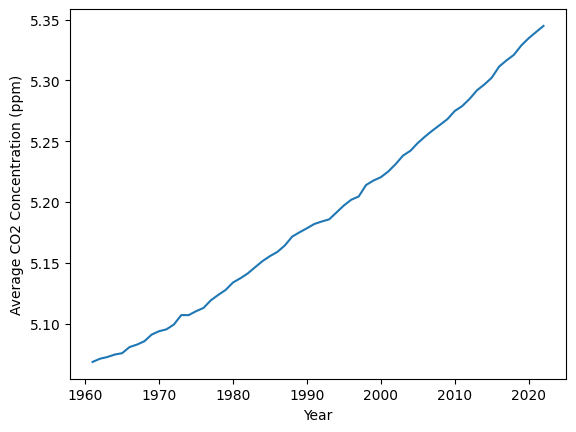

In [16]:
np.log(merged_data["CO2 Concentration"]).plot()
plt.xlabel('Year')
plt.ylabel('Average CO2 Concentration (ppm)')

As evident from the above plot, the relationship between year and CO2 concentration is a polynomial relationship with atleast 2 degrees. Thus, we use polynomial regression to fit a model through this data and forecast the CO2 concentration in upcoming years.

### Polynomial regression

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

X = np.array(merged_data.index).reshape(-1, 1)
y = merged_data['CO2 Concentration'].values

# Create polynomial regression model (degree=2 for this example)
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.15


### Hyperparameter tuning

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the parameter grid
param_grid = {
    'polynomialfeatures__degree': range(1, 10),  # Degrees to test
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],    # Regularization strengths
}

# Create the pipeline
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Perform grid search
grid = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X, y)

# Best parameters and score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Negative MSE: {grid.best_score_}")


Best Parameters: {'polynomialfeatures__degree': 4, 'ridge__alpha': 100}
Best Negative MSE: -0.33881461379538846


In [19]:
def temp_model(co2, current_co2=180):
    co2_percent = (co2 / current_co2 - 1) * 100
    return simulate_temperature_change(co2_percent)
    
def forecast(year, co2_model, temp_model):

    year_arr = np.array([year]).reshape(-1, 1)
    co2_at_year = float(co2_model.predict(year_arr))
    temp_at_year = temp_model(co2_at_year)

    return co2_at_year, temp_at_year

In [20]:
co2_model = grid.best_estimator_


# Forecasting the CO2 levels and global temperature for year 2050
forecast(2050, co2_model, temp_model)

(252.17308615285583, np.float64(2.812113795828447))

According to the forecast, by year 2050, if the trends stay as they are, the CO2 concentrations will increase to 252 ppm, which will result in the global temperature to rise to 2.81 $\degree C$

In [21]:
x_forecast = np.arange(2022, 2050).reshape(-1, 1)
co2_forecast = co2_model.predict(x_forecast)
temp_forecast = [temp_model(co2) for co2 in co2_forecast]

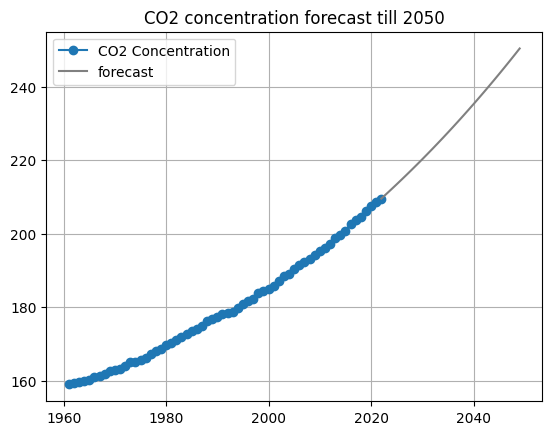

In [22]:
merged_data['CO2 Concentration'].plot(marker='o')
plt.plot(x_forecast, co2_forecast, color='gray', label = 'forecast')
plt.title('CO2 concentration forecast till 2050')
plt.legend()
plt.grid()
plt.savefig('./plots/co2_forecast.png')

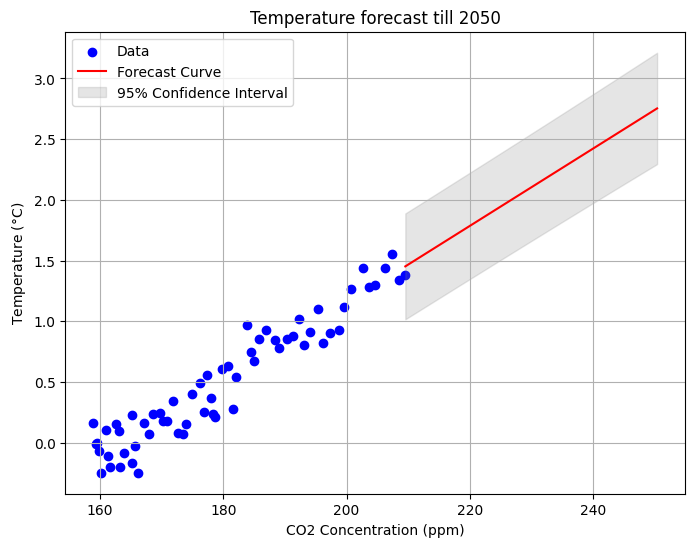

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from scipy.stats import t

X = merged_data['CO2 Concentration'].values.reshape(-1, 1)
y = merged_data['Temperature Change'].values

# Create and fit the polynomial regression model
degree = 4
model = LinearRegression()
model.fit(X, y)

# Predictions
X_pred = co2_forecast.reshape(-1, 1)  # Extend X for forecasting
y_pred = model.predict(X_pred)

# Calculate residuals
y_train_pred = model.predict(X)
residuals = y - y_train_pred
n = len(y)
p = degree + 1  # Number of predictors (including the intercept)

# Standard error of the regression
s = np.sqrt(np.sum(residuals**2) / (n - p))

# Standard error of predictions
X_poly = PolynomialFeatures(degree).fit_transform(X)
X_pred_poly = PolynomialFeatures(degree).fit_transform(X_pred)
se = s * np.sqrt(1 + np.sum((X_pred_poly @ np.linalg.pinv(X_poly.T @ X_poly) @ X_poly.T), axis=1))

# Critical t-value for 95% confidence
t_value = t.ppf(0.975, df=n - p)  # Two-tailed 95%

# Confidence intervals
upper_bound = y_pred + t_value * se
lower_bound = y_pred - t_value * se

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data", color="blue")
plt.plot(X_pred, y_pred, label="Forecast Curve", color="red")
plt.fill_between(X_pred.flatten(), lower_bound, upper_bound, color="gray", alpha=0.2, label="95% Confidence Interval")
plt.xlabel("CO2 Concentration (ppm)")
plt.ylabel(r"Temperature ($\degree$C)")
plt.title('Temperature forecast till 2050')
plt.legend()
plt.grid()
plt.savefig('./plots/temp_forecast.png')
